In [49]:
import geopandas as gpd
import pandas as pd
import geopy
from shapely.geometry import Point
import numpy as np
from geopy.geocoders import Nominatim

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 10000)


In [99]:
df = pd.read_excel('/home/abduallah/Aks Part/ATM_Locations/Task 2/atm_bank_misr.xlsx')

In [104]:
df.dropna(inplace= True)

df.to_excel('atm_bank_misr.xlsx')

In [103]:
import numpy as np

# Reading shapefile:-

In [6]:
df = gpd.read_file('admin\EGY_adm2.shp')
df = df[['NAME_1', 'NAME_2', 'TYPE_2', 'geometry']]
df.head()

NAME_1             NAME_2  TYPE_2  \
0  Ad Daqahliyah                Aja  Markaz   
1  Ad Daqahliyah       Al-Jamaliyah    Kism   
2  Ad Daqahliyah      Al-Mansurah 1    Kism   
3  Ad Daqahliyah  Al-Mansurah 2\r\n    None   
4  Ad Daqahliyah        Al-Mansurah  Markaz   

                                            geometry  
0  POLYGON ((31.23156 30.80004, 31.21846 30.83202...  
1  POLYGON ((31.99799 31.22747, 31.98231 31.22915...  
2  POLYGON ((31.37186 31.04893, 31.39912 31.05791...  
3  POLYGON ((31.39912 31.05791, 31.41530 31.08193...  
4  POLYGON ((31.60274 30.99705, 31.55927 30.96840...

In [7]:
df.isnull().sum()

NAME_1      0
NAME_2      0
TYPE_2      3
geometry    0
dtype: int64

<AxesSubplot:>

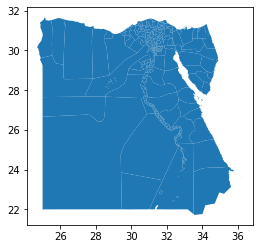

In [8]:
df['geometry'].plot()

# finding the polygon that contain each point

In [9]:
def isin(polygon, x,y):
    poly = polygon
    point = Point(y, x)
    if poly.contains(point):
        return True
    else:
        return False

In [10]:
gov = []
city = []
mk = []
long = []
lat = []
add = []
nulls = []

In [11]:
z = 0
ycnt = 0
ncnt = 0
for p in range(len(points)):
    z = 0
    for i,pol in enumerate(df['geometry'].values):
        if(isin(pol, points['Lat'][p], points['Long'][p])):
            z = 1
            ycnt += 1
            gov.append(df['NAME_1'][i])
            city.append(df['NAME_2'][i])
            mk.append(df['TYPE_2'][i])
            add.append(points['locations__card__location'][p])
            long.append(points['Long'][p])
            lat.append(points['Lat'][p])
            break
    if z == 0:
        nulls.append(p)
        ncnt += 1
        gov.append(np.nan)
        city.append(np.nan)
        mk.append(np.nan)
        long.append(np.nan)
        lat.append(np.nan)
        add.append(np.nan)

In [12]:
len(gov)

4280

In [13]:
nulls

[859, 876, 993, 1017, 1043]

In [14]:
ycnt

4275

In [15]:
ncnt

5

In [17]:
r = {}

In [18]:
res = pd.DataFrame(r)
res.head()

Empty DataFrame
Columns: []
Index: []

# Creating new data frame with new columns:-

In [19]:
res.insert(loc=0, column='governerate', value=gov)

In [20]:
res.insert(loc=1, column='City', value=city)
res.insert(loc=2, column='Markaz_or_qesm', value=mk)
res.insert(loc=3, column='Address', value=add)
res.insert(loc=4, column='Lat', value=lat)
res.insert(loc=5, column='Long', value=long)

In [21]:
res.head()

governerate       City Markaz_or_qesm  \
0   Al Fayyum  Al-Fayyum         Markaz   
1   Al Fayyum  Al-Fayyum         Markaz   
2   Al Fayyum  Al-Fayyum         Markaz   
3   Al Fayyum   Sinnuris         Markaz   
4   Al Fayyum       Itsa         Markaz   

                                         Address        Lat       Long  
0                  Alfayoum Beghous Alhoriea St.  29.304412  30.853546  
1                              Fayoum University  29.319696  30.835641  
2                            Fayoum AlHoriea St.  29.308199  30.842229  
3                               Sanoras - Fayoum  29.408575  30.865073  
4  194 Abo Bakr AlSiddiq St.- Atsa City - Fayoum  29.236966  30.790194

In [22]:
res.shape

(4280, 6)

In [23]:
res.isnull().sum()

governerate        5
City               5
Markaz_or_qesm    31
Address           17
Lat                5
Long               5
dtype: int64

In [24]:
res.drop(index=nulls, inplace=True)

In [25]:
res.isnull().sum()

governerate        0
City               0
Markaz_or_qesm    26
Address           12
Lat                0
Long               0
dtype: int64

In [26]:
res.to_excel('FinalResults.xlsx')

In [27]:
res['Markaz_or_qesm'].unique()

array(['Markaz', 'unorganized', 'Kism', 'City',
       'Police-administered area', None], dtype=object)

In [ ]:
pd.read